In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Real World Examples

### Line Graph

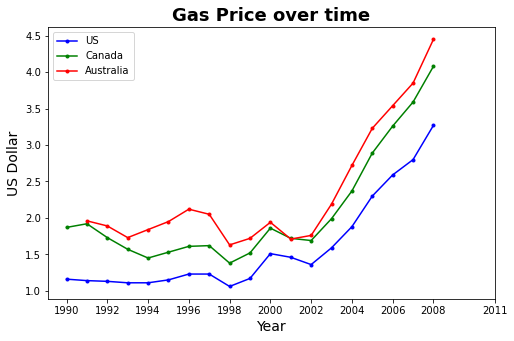

In [34]:
gas = pd.read_csv('gas_prices.csv')
gas

plt.figure(figsize=(8,5))
plt.plot(gas.Year,gas.USA, 'b.-',label='US')
plt.plot(gas.Year,gas.Canada, 'g.-',label='Canada')
plt.plot(gas.Year,gas.Australia, 'r.-',label='Australia')

#Another way to plot
# countries_to_look_at = ['USA','Canada','Australia','South Korea']

# for country in gas:
#     if country in countries_to_look_at:
#         plt.plot(gas.Year, gas[country], marker='.')



plt.title('Gas Price over time', fontdict={'fontweight':'bold', 'fontsize':18})
plt.xlabel('Year',fontdict={'fontsize':14})
plt.ylabel('US Dollar',fontdict={'fontsize':14})

plt.xticks(gas.Year[::2].tolist()+[2011])
plt.legend()

plt.savefig('Gas PRice over time.png',dpi=300)
plt.show()

## Load Fifa Data

In [36]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms

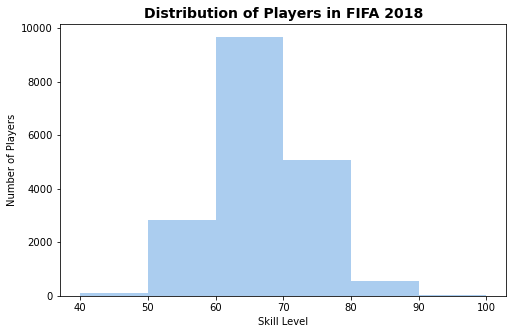

In [48]:
bins =[40,50,60,70,80,90,100]

plt.figure(figsize=(8,5))
plt.hist(fifa.Overall, bins=bins, color='#abcdef')

plt.title('Distribution of Players in FIFA 2018',fontdict={'fontweight':'bold','fontsize':14})
plt.xlabel('Skill Level')
plt.ylabel('Number of Players')

plt.xticks(bins)

plt.savefig('Histogram_Fifa_Players.png',dpi=300)

plt.show()

### Pie Chart

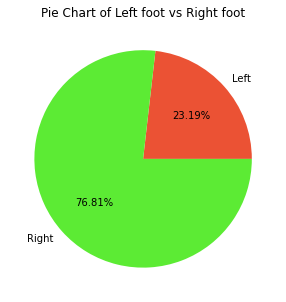

In [70]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
left

right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]
right

plt.figure(figsize=(8,5))

labels =['Left','Right']

plt.pie([left,right], labels=labels, colors=['#eb5234','#5ceb34'], autopct='%.2f%%')

plt.title('Pie Chart of Left foot vs Right foot')
plt.show()

### Pie chart 2

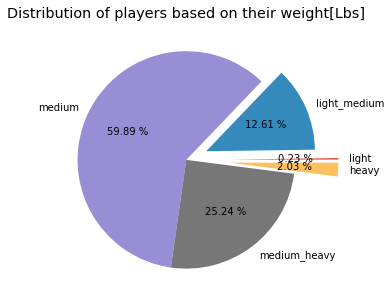

In [106]:
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

plt.style.use('ggplot')
plt.figure(figsize=(8,5))

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight>=125) & (fifa.Weight<150)].count()[0]
medium = fifa.loc[(fifa.Weight>=150) & (fifa.Weight<175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight>=175) & (fifa.Weight<200)].count()[0]
heavy = fifa.loc[fifa.Weight>200].count()[0]

Weights= [light,light_medium, medium, medium_heavy, heavy]

labels = ['light','light_medium', 'medium', 'medium_heavy', 'heavy']

#to explode the required part of the graph from the centre
explode = [.4,.2,0,0,.4]

#pct distance = distance the percentage symbol from the centre so that it's clearly visible
plt.pie(Weights,labels=labels,autopct='%.2f %%', pctdistance=0.6, explode=explode)

plt.title('Distribution of players based on their weight[Lbs]')

plt.savefig('Distribution of players based on their weight.png',dpi=300)
plt.show()

### Box and Whiskers chart

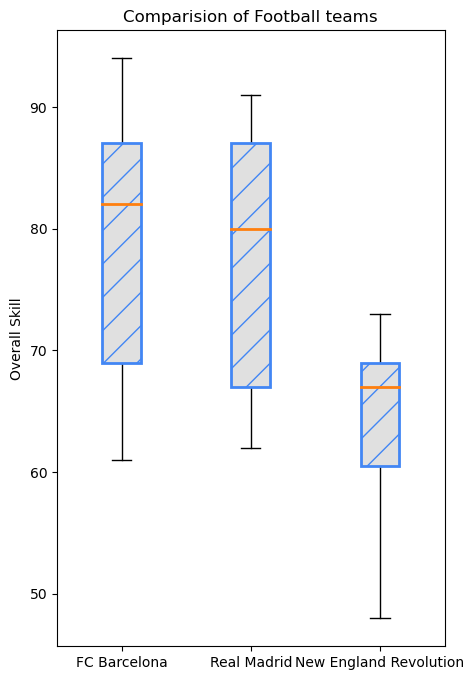

In [118]:
plt.style.use('default')

plt.figure(figsize=(5,8))

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == "Real Madrid"]['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']


bp = plt.boxplot([barcelona,madrid,revs], labels=['FC Barcelona','Real Madrid','New England Revolution'], patch_artist=True, medianprops={'linewidth':2})


plt.title('Comparision of Football teams')
plt.ylabel('Overall Skill')

for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color
    box.set(facecolor = '#e0e0e0' )
    # change hatch
    box.set(hatch = '/')
plt.show()

plt.savefig('Box Chart.png')